In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
from queue import Queue

In [3]:
def colored_to_gray(img):
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    gray_img = 0.2989 * R + 0.5870 * G + 0.1140 * B
    return gray_img

In [3]:
# 1.1
def median_filter(img,k):
    h, w = img.shape
    p = (k-1)//2
    new_img = np.zeros((h, w), img.dtype)
    
    for i in range(h):
        vec = []
        j = 0
        for k1 in range(-p,p+1):
            for k2 in range(-p,p+1):
                if i+k1>=0 and i+k1<h and j+k2>=0 and j+k2<w:
                    vec.append(img[i+k1,j+k2])
                    
        new_img[i,j] = np.median(vec)
        
        for j in range(1,w):
            # erasing column j-p-1
            if j-p-1>=0:
                for k1 in range(-p,p+1):
                    if i+k1>=0 and i+k1<h:
                        vec.remove(img[i+k1,j-p-1])
                
            # adding column j+p
            if j+p<w:
                for k1 in range(-p,p+1):
                    if i+k1>=0 and i+k1<h:
                        vec.append(img[i+k1,j+p])
                
            new_img[i,j] = np.median(vec)
            
    return new_img

In [3]:
def color_median_filter(img,k):
    h,w,c = img.shape
    red = np.zeros((h, w), img.dtype)
    green = np.zeros((h, w), img.dtype)
    blue = np.zeros((h, w), img.dtype)
    for i in range(h):
        for j in range(w):
            red[i,j] = img[i,j,0]
            green[i,j] = img[i,j,1]
            blue[i,j] = img[i,j,2]

    red = median_filter(red,3)
    green = median_filter(green,3)
    blue = median_filter(blue,3)

    for i in range(h):
        for j in range(w):
            img[i,j,0] = red[i,j]
            img[i,j,1] = green[i,j]
            img[i,j,2] = blue[i,j]
            
    return img

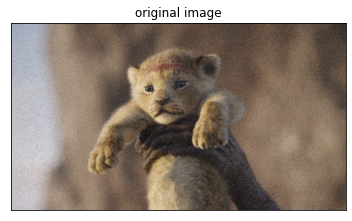

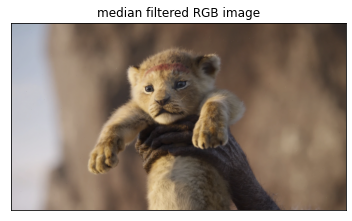

In [4]:
img = cv2.imread('../images/NoisySimba.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

img = color_median_filter(img,3)
        
plt.imshow(img)
plt.title('median filtered RGB image')
plt.xticks([]), plt.yticks([]) 
plt.show()

In [5]:
# 1.2
def colorlinContrastStretching(img,a,b):
    new_img = np.zeros(img.shape, img.dtype)
    ma = np.max(img)
    mi = np.min(img)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                val = a + (((img[y,x,c]-mi)*(b-a))/(ma-mi))
                if val>b:
                    val=b
                new_img[y,x,c] = val
                    
    return new_img

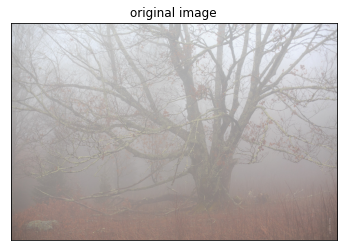

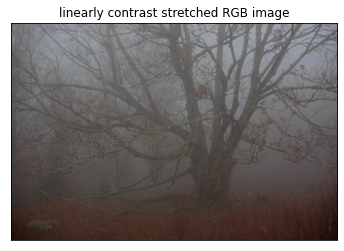

In [11]:
img = cv2.imread('../images/fog.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

img = colorlinContrastStretching(img,0,175)
        
plt.imshow(img)
plt.title('linearly contrast stretched RGB image')
plt.xticks([]), plt.yticks([]) 
plt.show()

In [13]:
# 1.3
def histEqualization(im):
    hist_cnt = np.zeros((256,),dtype=np.int32)
    height, width = im.shape

    #finding histogram count
    for i in range(width):
        for j in range(height):
            hist_cnt[im[j,i]] += 1  

    constant = 1.0/(height*width)
    eq_hist = np.zeros((256,),dtype=np.float16)
    cdf = np.zeros((256,),dtype=np.float16)   

    cdf[0] = (hist_cnt[0]*constant)
    for i in range(256):
        eq_hist[i] = round(255*cdf[i])
        if i+1<256:
            cdf[i+1] = cdf[i] + (hist_cnt[i+1]*constant)

    #Re-map values from equalized histogram into the image
    for i in range(width):
        for j in range(height):
            im[j,i]= eq_hist[im[j,i]]

    return im

In [14]:
def color_histEqualization(img):
    h,w,c = img.shape
    red = np.zeros((h, w), img.dtype)
    green = np.zeros((h, w), img.dtype)
    blue = np.zeros((h, w), img.dtype)
    for i in range(h):
        for j in range(w):
            red[i,j] = img[i,j,0]
            green[i,j] = img[i,j,1]
            blue[i,j] = img[i,j,2]

    red = histEqualization(red)
    green = histEqualization(green)
    blue = histEqualization(blue)

    for i in range(h):
        for j in range(w):
            img[i,j,0] = red[i,j]
            img[i,j,1] = green[i,j]
            img[i,j,2] = blue[i,j]
            
    return img

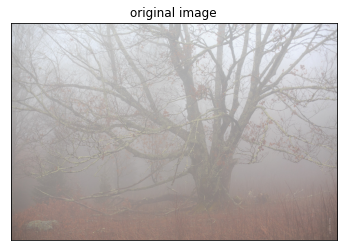

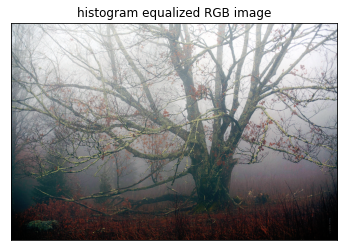

In [15]:
img = cv2.imread('../images/fog.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

img = color_histEqualization(img)
        
plt.imshow(img)
plt.title('histogram equalized RGB image')
plt.xticks([]), plt.yticks([]) 
plt.show()

In [5]:
# 1.4 
# VINTAGE EFFECT
def vintage_effect(img):
    h,w,c = img.shape
    R = np.zeros((h, w), img.dtype)
    G = np.zeros((h, w), img.dtype)
    B = np.zeros((h, w), img.dtype)
    for i in range(h):
        for j in range(w):
            R[i,j] = img[i,j,0]
            G[i,j] = img[i,j,1]
            B[i,j] = img[i,j,2]

    outR = np.zeros((h, w), img.dtype)
    outG = np.zeros((h, w), img.dtype)
    outB = np.zeros((h, w), img.dtype)
    for i in range(h):
        for j in range(w):
            outR[i,j] = min(255,math.floor((R[i,j] * .293) + (G[i,j] *.769) + (B[i,j] * .210)))
            outG[i,j] = min(255,math.floor((R[i,j] * .249) + (G[i,j] *.686) + (B[i,j] * .188)))
            outB[i,j] = min(255,math.floor((R[i,j] * .172) + (G[i,j] *.534) + (B[i,j] * .151)))
    
    for i in range(h):
        for j in range(w):
            img[i,j,0] = outR[i,j]
            img[i,j,1] = outG[i,j]
            img[i,j,2] = outB[i,j]
            
    return img

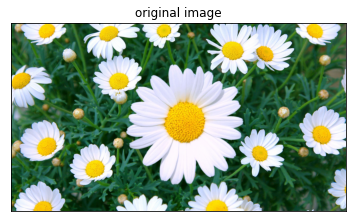

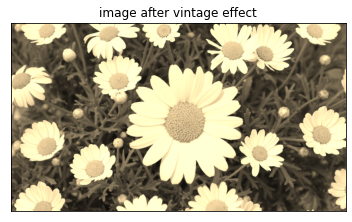

In [6]:
img = cv2.imread('../images/flower.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

img = vintage_effect(img)
        
plt.imshow(img)
plt.title('image after vintage effect')
plt.xticks([]), plt.yticks([]) 
plt.show()

In [26]:
# Matrix Effect -> r^3/2, g^4/5, b^3/2 
def matrix_effect(img):
    img = np.array(img, dtype="float64")
    h,w,c = img.shape
    final_img = np.zeros(img.shape, float)
    for i in range(h):
        for j in range(w):
            final_img[i,j,0] = (img[i,j,0]**(3/2))
            final_img[i,j,1] = (img[i,j,1]**(4/5))
            final_img[i,j,2] = (img[i,j,2]**(3/2))
            
    final_img = final_img.astype(int)
    for i in range(h):
        for j in range(w):
            final_img[i,j,0] = (final_img[i,j,0]/4072)*255
            final_img[i,j,1] = (final_img[i,j,1]/84)*255
            final_img[i,j,2] = (final_img[i,j,2]/4072)*255
            
    return final_img

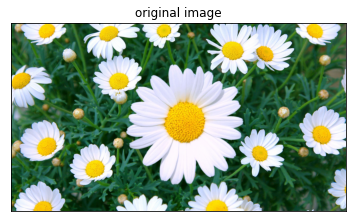

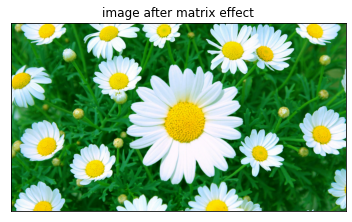

In [28]:
img = cv2.imread('../images/flower.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

img = matrix_effect(img)
        
plt.imshow(img)
plt.title('image after matrix effect')
plt.xticks([]), plt.yticks([]) 
plt.show()

In [7]:
# VIGNETTING EFFECT
def vignetting_effect(img):
    texture = cv2.imread('../images/texture.jpg')
    texture = colored_to_gray(texture)
    h,w,c = img.shape
    texture = cv2.resize(texture, (w,h))
    
    red = np.zeros((h, w), img.dtype)
    green = np.zeros((h, w), img.dtype)
    blue = np.zeros((h, w), img.dtype)
    for i in range(h):
        for j in range(w):
            red[i,j] = img[i,j,0]
            green[i,j] = img[i,j,1]
            blue[i,j] = img[i,j,2]

    for i in range(h):
        for j in range(w):
            red[i,j] = math.floor((red[i,j] * texture[i,j])/255)
            green[i,j] = math.floor((green[i,j] * texture[i,j])/255)
            blue[i,j] = math.floor((blue[i,j] * texture[i,j])/255)

    for i in range(h):
        for j in range(w):
            img[i,j,0] = red[i,j]
            img[i,j,1] = green[i,j]
            img[i,j,2] = blue[i,j]
            
    return img

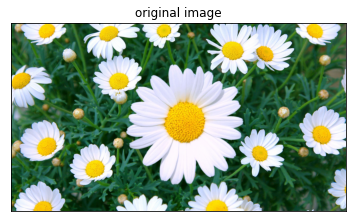

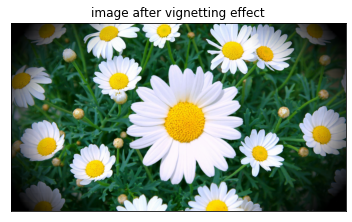

In [8]:
img = cv2.imread('../images/flower.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

img = vignetting_effect(img)
        
plt.imshow(img)
plt.title('image after vignetting effect')
plt.xticks([]), plt.yticks([]) 
plt.show()

In [10]:
# DUO-TONE
def exponential_function(channel, exp):
    table = np.array([min((i**exp), 255) for i in np.arange(0, 256)]).astype("uint8") # creating table for exponent
    channel = cv2.LUT(channel, table)
    return channel

def tone(img, number):
    for i in range(3):
        if i == number:
            img[:, :, i] = exponential_function(img[:, :, i], 1.05) # applying exponential function on slice
        else:
            img[:, :, i] = 0 # setting values of all other slices to 0
    return img

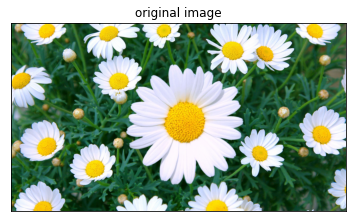

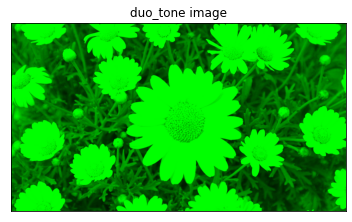

In [11]:
img = cv2.imread('../images/flower.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

img = tone(img, 1)

plt.imshow(img)
plt.title('duo_tone image')
plt.xticks([]), plt.yticks([]) 
plt.show()

In [4]:
# 2.1
def dfs(img,r, c, col,vis):
    h,w = img.shape
    vis[r][c] = col
    if r-1>=0 and vis[r-1][c]==0 and img[r-1][c]!= 0:
        dfs(img,r-1,c,col,vis)
    if r+1<h and vis[r+1][c]==0 and img[r+1][c]!=0:
        dfs(img,r+1,c,col,vis)
    if c-1>=0 and vis[r][c-1]==0 and img[r][c-1]!=0:
        dfs(img,r,c-1,col,vis)
    if c+1<w and vis[r][c+1]==0 and img[r][c+1]!=0:
        dfs(img,r,c+1,col,vis)

In [36]:
def region_of_interest(img_path):
    img = cv2.imread(img_path,0)
    plt.imshow(img, cmap='gray')
    plt.title('original image')
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    
    # thresholding
    img = (img > 100).astype(np.uint8)
    plt.imshow(img, cmap='gray')
    plt.title('image thresholding')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)))
    plt.imshow(img, cmap='gray')
    plt.title('Closing of image using 3*3 CROSS structuring element')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_CROSS, (13, 13)))
    plt.imshow(img, cmap='gray')
    plt.title('Opening of image using 13*13 CROSS structuring element')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

    img = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5)), iterations = 5)
    plt.imshow(img, cmap='gray')
    plt.title('Erosion of image using 5*5 CROSS structuring element')
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    
    img = cv2.resize(img, (300,300))
    h, w = img.shape
    plt.imshow(img, cmap='gray')
    plt.title('resized binary image')
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    
    # handling the corners     
    sys.setrecursionlimit(100000)
    vis = np.zeros(img.shape)
    if img[0,0]!=0:
        dfs(img,0,0,-1,vis)
    if img[h-1,0]!=0:
        dfs(img,h-1,0,-1,vis)
    if img[0,w-1]!=0:
        dfs(img,0,w-1,-1,vis)
    if img[h-1,w-1]!=0:
        dfs(img,h-1,w-1,-1,vis)
    
    # region of interset coloring     
    col = 1
    for i in range(h):
        for j in range(w):
            if vis[i][j] == 0 and img[i,j] != 0:   #not visited and white region
                dfs(img,i,j,col,vis)
                col += 1
    print('Number of regions of interset: {}'.format(col))

    COLORS = [(255, 0, 0), (0, 255, 0), (0,0,255), (255,255,0), (255,0,255), (0,255,255)]
    final_img = np.zeros((h, w,3))
    for i in range(h):
        for j in range(w):
            if vis[i,j] == -1:   #corners
                final_img[i,j,0] = 0
                final_img[i,j,1] = 0 
                final_img[i,j,2] = 0 

            elif img[i,j]==1:    #internal regions
                col = math.floor(vis[i,j]%6)   #we have 6 colors in above array
                final_img[i,j,0] = COLORS[col][0] 
                final_img[i,j,1] = COLORS[col][1] 
                final_img[i,j,2] = COLORS[col][2] 
    
    
    plt.imshow(final_img)
    plt.title('region of interset: colored')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

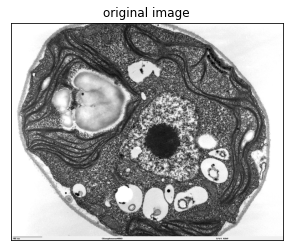

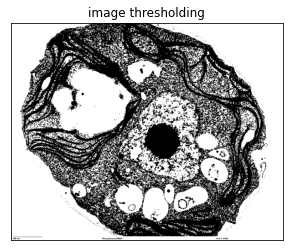

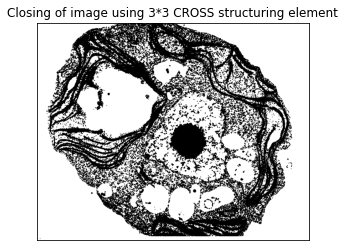

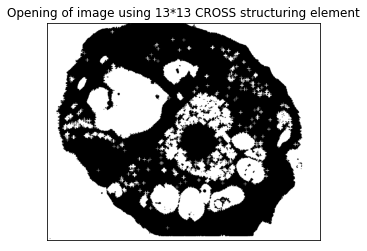

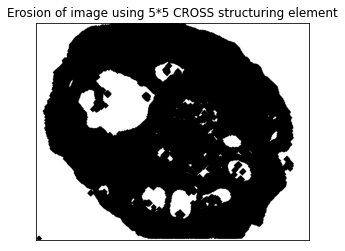

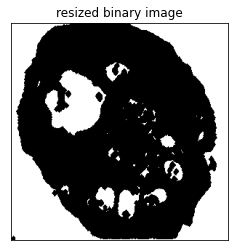

Number of regions of interset: 71


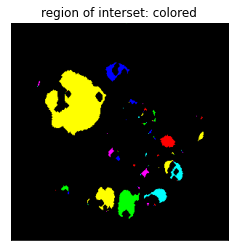

In [37]:
# fiding region of interest on cell.png image
region_of_interest('../images/cell.png')

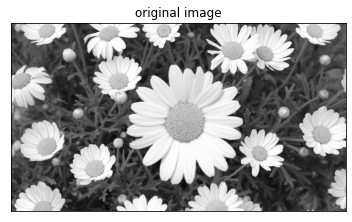

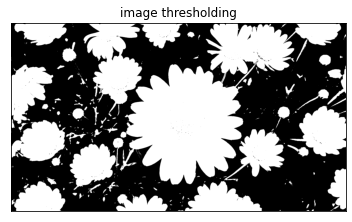

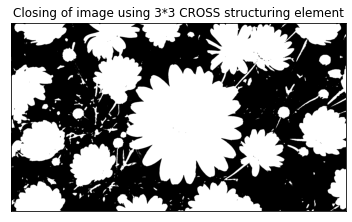

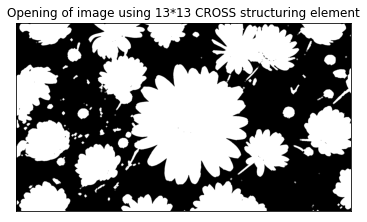

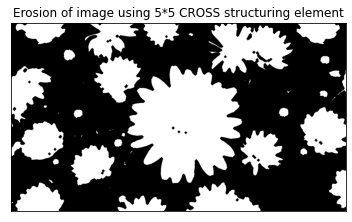

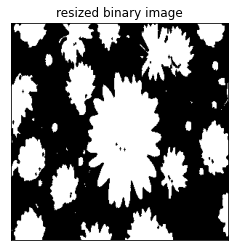

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of regions of interset: 63


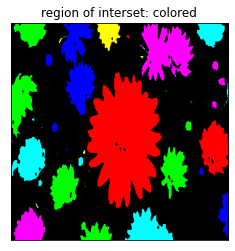

In [6]:
# fiding region of interest on cell.png image
region_of_interest('../images/flower.jpeg')

In [4]:
# 2.2a
flag = 0 
def hole_dfs(img,r,c,col,vis):
    global flag
    h,w = img.shape
    vis[r][c] = col
    
    if r-1>=0 and vis[r-1][c]==0 and img[r-1][c]==0:
        flag = 1
    if r+1<h and vis[r+1][c]==0 and img[r+1][c]==0:
        flag = 1
    if c-1>=0 and vis[r][c-1]==0 and img[r][c-1]==0:
        flag = 1
    if c+1<w and vis[r][c+1]==0 and img[r][c+1]==0:
        flag = 1
    
    if r-1>=0 and vis[r-1][c]==0 and img[r-1][c]== 1:
        hole_dfs(img,r-1,c,col,vis)
    if r+1<h and vis[r+1][c]==0 and img[r+1][c]== 1:
        hole_dfs(img,r+1,c,col,vis)
    if c-1>=0 and vis[r][c-1]==0 and img[r][c-1]==1:
        hole_dfs(img,r,c-1,col,vis)
    if c+1<w and vis[r][c+1]==0 and img[r][c+1]==1:
        hole_dfs(img,r,c+1,col,vis)
    

In [5]:
def temp_dfs(img,r, c, col,vis):
    h,w = img.shape
    vis[r][c] = col
    if r-1>=0 and vis[r-1][c]==0 and img[r-1][c]== 0:
        temp_dfs(img,r-1,c,col,vis)
    if r+1<h and vis[r+1][c]==0 and img[r+1][c]==0:
        temp_dfs(img,r+1,c,col,vis)
    if c-1>=0 and vis[r][c-1]==0 and img[r][c-1]==0:
        temp_dfs(img,r,c-1,col,vis)
    if c+1<w and vis[r][c+1]==0 and img[r][c+1]==0:
        temp_dfs(img,r,c+1,col,vis)

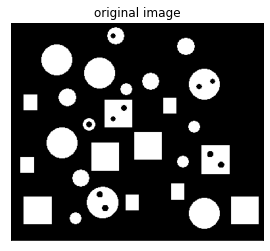

Number of objects with one or more holes in them are:  6


In [9]:
# 2.2a -> firstly by marking outside region as visited, we will run DFS inside the white portion and find the objects which has black region unvisited in them(basically holes)
img = cv2.imread('../images/objects.png', 0)
img = (img > 127).astype(np.uint8)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

img = cv2.resize(img, (128,128))
h,w = img.shape

sys.setrecursionlimit(100000)
vis = np.zeros(img.shape)
if img[0,0]==0 and vis[0,0]==0:
    temp_dfs(img,0,0,1,vis)
if img[h-1,0]==0 and vis[h-1,0]==0:
    temp_dfs(img,h-1,0,1,vis)
if img[0,w-1]==0 and vis[0,w-1]==0:
    temp_dfs(img,0,w-1,1,vis)
if img[h-1,w-1]==0 and vis[h-1,w-1]==0:
    temp_dfs(img,h-1,w-1,1,vis)
    

cnt = 0
for i in range(h):
    for j in range(w):
        if img[i,j] == 1 and vis[i,j] == 0:
            flag = 0
            hole_dfs(img,i,j,1,vis)
            cnt += flag
            
print("Number of objects with one or more holes in them are: ",cnt)

In [5]:
# 2.2b
img = cv2.imread('../images/objects.png', cv2.IMREAD_GRAYSCALE)
img = (img > 127).astype(np.uint8)
eimg = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)))
# edge detection
img = img- eimg

# detecting corner of a square
kernel = np.zeros((4,4),np.uint8)
for i in range(1, 4):
    kernel[1][i] = 1
    kernel[i][1] = 1    

img = cv2.erode(img, kernel, iterations = 1)

c = 0
h, w = img.shape
vis = np.zeros((h,w))
# running from (1,1) because our SE can satisfy at top left corner too
for i in range(1, h):
    for j in range(1, w):
        if img[i][j] != 0 and vis[i][j] == 0:
            dfs(img,i, j, 1, vis)
            c += 1
            
print("Number of squares in the image = ", c)

Number of squares in the image =  11


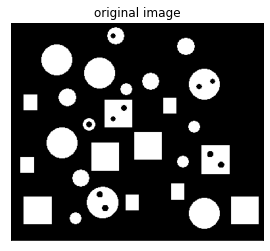

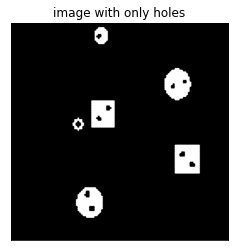

Number of squares with holes are:  2


In [60]:
# 2.2c -> firstly we will seperate all those elements that have holes and after that, we will find out among them, which one of these are squares
img = cv2.imread('../images/objects.png', 0)
img = (img > 127).astype(np.uint8)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

img = cv2.resize(img, (128,128))
h,w = img.shape

sys.setrecursionlimit(100000)
vis = np.zeros(img.shape)
if img[0,0]==0 and vis[0,0]==0:
    temp_dfs(img,0,0,1,vis)
if img[h-1,0]==0 and vis[h-1,0]==0:
    temp_dfs(img,h-1,0,1,vis)
if img[0,w-1]==0 and vis[0,w-1]==0:
    temp_dfs(img,0,w-1,1,vis)
if img[h-1,w-1]==0 and vis[h-1,w-1]==0:
    temp_dfs(img,h-1,w-1,1,vis)
    
arr = []
for i in range(h):
    for j in range(w):
        if img[i,j] == 1 and vis[i,j] == 0:
            flag = 0
            hole_dfs(img,i,j,1,vis)
            if flag == 1:
                arr.append((i,j))
                
vis = np.zeros(img.shape)
for i in range(len(arr)):
    dfs(img,arr[i][0],arr[i][1],1,vis)
    
for i in range(h):
    for j in range(w):
        if vis[i,j] == 0:
            img[i,j] = 0
    

img = cv2.resize(img, (1024,1024))
    
plt.imshow(img, cmap='gray')
plt.title('image with only holes')
plt.xticks([]), plt.yticks([]) 
plt.show()

# obtaining only squares by applying opening and choosing SE as square of 15*15
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15)), iterations=4)
img = cv2.resize(img, (128,128))
vis = np.zeros(img.shape)
h,w = img.shape

cnt = 0
for i in range(h):
    for j in range(w):
        if img[i,j]==1 and vis[i,j]==0:
            dfs(img,i,j,1,vis)
            cnt+=1
            
print('Number of squares with holes are: ',cnt)

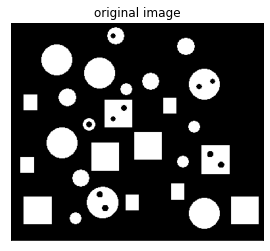

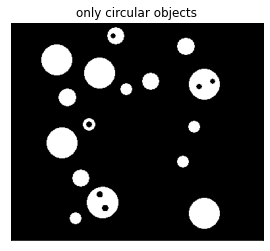

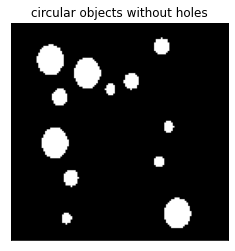

Number of circles without any holes are:  12


In [94]:
# 2.2d -> firstly we will detect square obj and remove them from the image, after that we identify obj with circles and remove them
img = cv2.imread('../images/objects.png', 0)
img = (img > 127).astype(np.uint8)
cp_img = img
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

eimg = cv2.erode(cp_img, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)))
# edge detection
cp_img = cp_img - eimg

# detecting corner of a square
kernel = np.zeros((4,4),np.uint8)
for i in range(1, 4):
    kernel[1][i] = 1
    kernel[i][1] = 1    

cp_img = cv2.erode(cp_img, kernel, iterations = 1)

arr = []
h, w = img.shape
vis = np.zeros(img.shape)
# running from (1,1) because our SE can satisfy at top left corner too
for i in range(1, h):
    for j in range(1, w):
        if cp_img[i][j] != 0 and vis[i][j] == 0:
            dfs(cp_img,i, j, 1, vis)
            arr.append((i,j))
            
vis = np.zeros(img.shape)
for i in range(len(arr)):
    dfs(img,arr[i][0],arr[i][1],1,vis)
    
for i in range(h):
    for j in range(w):
        if vis[i,j] == 1:
            img[i,j] = 0

plt.imshow(img, cmap='gray')
plt.title('only circular objects')
plt.xticks([]), plt.yticks([]) 
plt.show()

img = cv2.resize(img, (128,128))
h,w = img.shape

sys.setrecursionlimit(100000)
vis = np.zeros(img.shape)
if img[0,0]==0 and vis[0,0]==0:
    temp_dfs(img,0,0,1,vis)
if img[h-1,0]==0 and vis[h-1,0]==0:
    temp_dfs(img,h-1,0,1,vis)
if img[0,w-1]==0 and vis[0,w-1]==0:
    temp_dfs(img,0,w-1,1,vis)
if img[h-1,w-1]==0 and vis[h-1,w-1]==0:
    temp_dfs(img,h-1,w-1,1,vis)
    
# storing the co-prdinates of objs having holes
arr = []
for i in range(h):
    for j in range(w):
        if img[i,j] == 1 and vis[i,j] == 0:
            flag = 0
            hole_dfs(img,i,j,1,vis)
            if flag == 1:
                arr.append((i,j))
            
vis = np.zeros(img.shape)
for i in range(len(arr)):
    dfs(img,arr[i][0],arr[i][1],1,vis)
    
for i in range(h):
    for j in range(w):
        if vis[i,j] == 1:
            img[i,j]=0
            
plt.imshow(img, cmap='gray')
plt.title('circular objects without holes')
plt.xticks([]), plt.yticks([]) 
plt.show()

cnt = 0
vis = np.zeros(img.shape)
for i in range(h):
    for j in range(w):
        if img[i,j]==1 and vis[i,j]==0:
            dfs(img,i,j,1,vis)
            cnt+=1
            
print('Number of circles without any holes are: ',cnt)

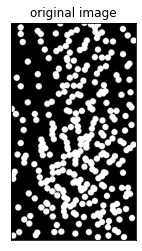

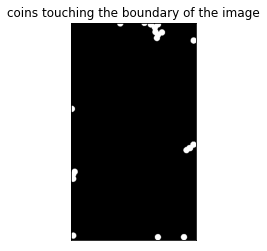

In [96]:
# 2.3a -> move around the edges and mark the coins that are touching the edge and after that remove other part
img = cv2.imread('../images/circles.jpg', 0)
img = (img > 127).astype(np.uint8)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

h,w = img.shape
vis = np.zeros(img.shape)
# moving along the edges
for i in range(h):
    if img[i,0]==1 and vis[i,0]==0:
        dfs(img,i,0,1,vis)
    if img[i,w-1]==1 and vis[i,w-1]==0:
        dfs(img,i,w-1,1,vis)
        
for j in range(w):
    if img[0,j]==1 and vis[0,j]==0:
        dfs(img,0,j,1,vis)
    if img[h-1,j]==1 and vis[h-1,j]==0:
        dfs(img,h-1,j,1,vis)
        
for i in range(h):
    for j in range(w):
        if vis[i,j]==0:
            img[i,j]=0
            
plt.imshow(img, cmap='gray')
plt.title('coins touching the boundary of the image')
plt.xticks([]), plt.yticks([]) 
plt.show()

In [6]:
def bfs(img,r,c,col,vis):
    h,w = img.shape
    q = Queue()
    q.put((r,c))
    vis[r,c] = 1
    cnt = 0
    while not q.empty():
        cnt += 1
        r, c = q.get()
        if r-1>=0 and vis[r-1,c] == 0 and img[r-1,c]!=0:
            vis[r-1,c] = col
            q.put((r-1,c))
        if r+1<h and vis[r+1,c] == 0 and img[r+1,c]!=0:
            vis[r+1,c] = 1
            q.put((r+1,c))
        if c-1>=0 and vis[r,c-1] == 0 and img[r,c-1]!=0:
            vis[r,c-1] = 1
            q.put((r,c-1))
        if c+1<w and vis[r,c+1] == 0 and img[r,c+1]!=0:
            vis[r,c+1] = 1
            q.put((r,c+1))
            
    return cnt

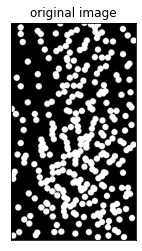

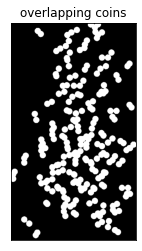

In [8]:
# 2.3b -> we will find the min area and will use that to obtain the only overlapping coins
img = cv2.imread('../images/circles.jpg', 0)
img = (img > 127).astype(np.uint8)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

h,w = img.shape
vis = np.zeros(img.shape)

mi = 10000
ma = 0
for i in range(h):
    for j in range(w):
        if img[i,j]==1 and vis[i,j]==0:
            val = bfs(img,i,j,1,vis)
            mi = min(mi,val)
            ma= max(ma,val)
#             print(val)
            
vis = np.zeros(img.shape)
arr = []
for i in range(h):
    for j in range(w):
        if img[i,j]==1 and vis[i,j]==0:
            val = bfs(img,i,j,1,vis)
            if val >= 400:
                arr.append((i,j))
                
vis = np.zeros(img.shape)
for i in range(len(area_arr)):
    dfs(img,arr[i][0],arr[i][1],1,vis)
    
for i in range(h):
    for j in range(w):
        if vis[i,j]==0:
            img[i,j]=0
            
plt.imshow(img, cmap='gray')
plt.title('overlapping coins')
plt.xticks([]), plt.yticks([]) 
plt.show()         

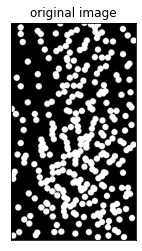

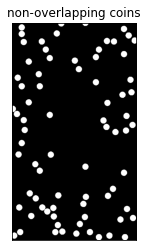

In [9]:
# 2.3c -> using the visited of last part, we can obtain non-overlapping coins
img = cv2.imread('../images/circles.jpg', 0)
img = (img > 127).astype(np.uint8)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

for i in range(h):
    for j in range(w):
        if vis[i,j]==1:
            img[i,j]=0
            
plt.imshow(img, cmap='gray')
plt.title('non-overlapping coins')
plt.xticks([]), plt.yticks([]) 
plt.show()

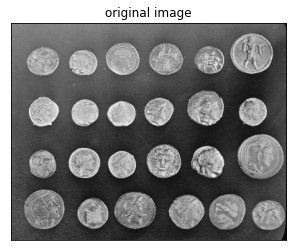

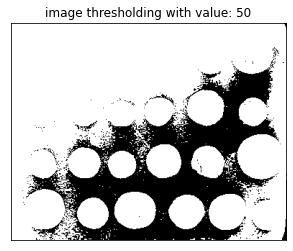

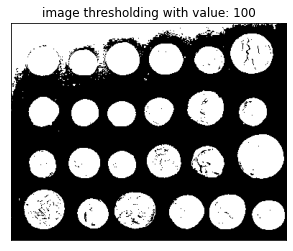

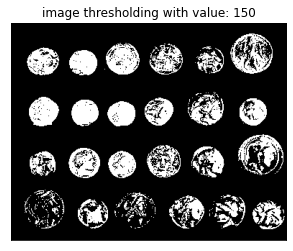

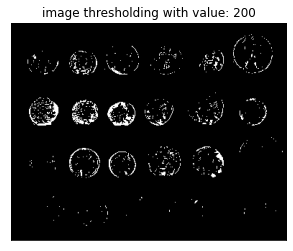

In [14]:
# 3.1a   -> not use morphological methods to fill gaps
img = cv2.imread('../images/coins.png', 0)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

arr = [50,100,150,200]
for i in range(len(arr)):
    thresh_img = (img > arr[i]).astype(np.uint8)
    plt.imshow(thresh_img, cmap='gray')
    plt.title('image thresholding with value: {}'.format(arr[i]))
    plt.xticks([]), plt.yticks([]) 
    plt.show()


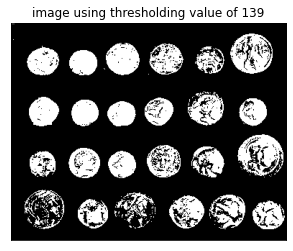

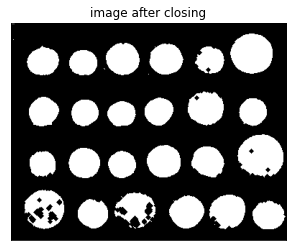

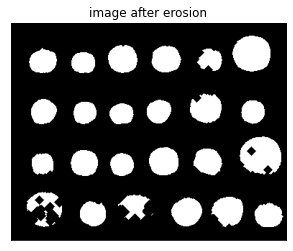

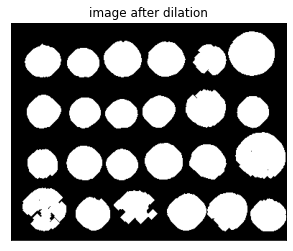

Number of coins in the image:  24


In [39]:
# calculating number of coins
val = 139
img = cv2.imread('../images/coins.png', 0)
img = (img > val).astype(np.uint8)

plt.imshow(img, cmap='gray')
plt.title('image using thresholding value of {}'.format(val))
plt.xticks([]), plt.yticks([]) 
plt.show()

# close to obtain circle shape
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)), iterations=3)
plt.imshow(img, cmap='gray')
plt.title('image after closing')
plt.xticks([]), plt.yticks([]) 
plt.show()

# erode to remove white spots in between
img = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)), iterations = 3)
plt.imshow(img, cmap='gray')
plt.title('image after erosion')
plt.xticks([]), plt.yticks([]) 
plt.show()

# dilate to remove black spots in coins making them 2 different objects
img = cv2.dilate(img, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)), iterations = 6)
plt.imshow(img, cmap='gray')
plt.title('image after dilation')
plt.xticks([]), plt.yticks([]) 
plt.show()

cnt = 0
vis = np.zeros(img.shape)
h,w = img.shape
for i in range(h):
    for j in range(w):
        if img[i,j]==1 and vis[i,j]==0:
            dfs(img,i,j,1,vis)
            cnt+=1
            
print('Number of coins in the image: ',cnt)

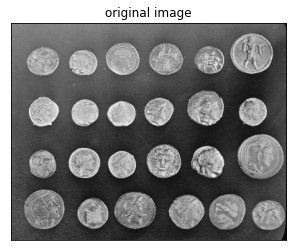

OSTU's threshold using my implementation:  107
OSTU's threshold using in-built function:  107.0


In [6]:
# 3.1b ->otsu's implementation
img = cv2.imread('../images/coins.png', 0)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

h,w = img.shape
freq = [0]*256
total_pix = h*w
for i in range(h):
    for j in range(w):
        freq[img[i,j]]+=1

prob = [0.0]*256
p2 = 0.0
sum2 = 0.0
for i in range(256):
    prob[i] = (freq[i]/total_pix)
    p2+=prob[i]
    sum2 += (prob[i]*i)
    
ma = 0.0
threshold = 0
p1 = 0.0
sum1 = 0.0
for i in range(255):
    p1+=prob[i]
    p2-=prob[i]
    val = (i*prob[i])
    sum1+=val
    sum2-=val
    if p1>0.0 and p2>0.0:
        val = (p1*p2*(((sum1/p1)-(sum2/p2))**2))
        if val > ma:
            threshold=i
            ma=val
        
print('OSTU\'s threshold using my implementation: ',threshold)
# in-built function
ret, thresh1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print('OSTU\'s threshold using in-built function: ',ret)
    

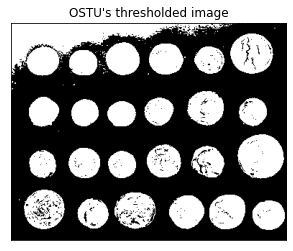

Number of coins in the image:  24


In [7]:
img = cv2.imread('../images/coins.png', 0)
img = (img > 107).astype(np.uint8)
plt.imshow(img, cmap='gray')
plt.title('OSTU\'s thresholded image')
plt.xticks([]), plt.yticks([]) 
plt.show()

# close to obtain circle shape
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)), iterations=3)

# erode to remove white spots in between
img = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)), iterations = 7)

cnt = 0
vis = np.zeros(img.shape)
h,w = img.shape
for i in range(h):
    for j in range(w):
        if img[i,j]==1 and vis[i,j]==0:
            temp = bfs(img,i,j,1,vis)
            cnt+=1
            
print('Number of coins in the image: ',cnt)

From both of these methods we got 24 coins as answer

In [3]:
# Our filtering function (assuming that im is already padded)
# It converts the matrix to a 4-d array
# im => image or input
# fil => filter
# return filtred image
def filter(im, fil):
    fil = np.array(fil)
    # Get the shape of the 4d array needed for filtering     
    view_shape = tuple(np.subtract(im.shape, fil.shape) + 1) + fil.shape
    strd = np.lib.stride_tricks.as_strided
    # Get the new view of the array as required for filtering     
    subM = strd(im, shape = view_shape, strides = im.strides * 2)
    # for every i,j element in filter with <k,l> 2d array of subM
    # and return thier sum of as an i,j 2d array   
    return np.einsum('ij,ijkl->kl',fil,subM.T).T

def gradient_filters(img, fil_x, fil_y):
    img_x = filter(img,fil_x)
    img_y = filter(img,fil_y)
    img = np.sqrt(img_y**2 + img_x**2)
    return img

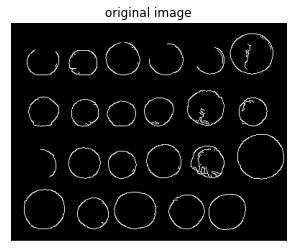

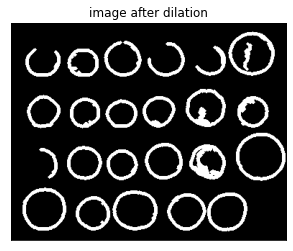

Number of coins in the image:  24


In [60]:
# 3.2 
# CANNY
img = cv2.imread('../images/coins.png', 0)
img = cv2.Canny(img,255,700)
plt.title('original image')
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

img = cv2.dilate(img, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)), iterations = 2)
plt.imshow(img, cmap='gray')
plt.title('image after dilation')
plt.xticks([]), plt.yticks([]) 
plt.show()

cnt = 0
vis = np.zeros(img.shape)
h,w = img.shape
for i in range(h):
    for j in range(w):
        if img[i,j]!=0 and vis[i,j]==0:
            temp = bfs(img,i,j,1,vis)
            cnt+=1
            
print('Number of coins in the image: ',cnt)

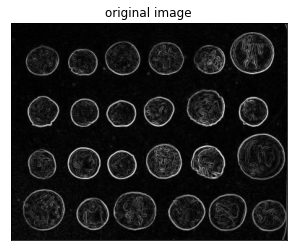

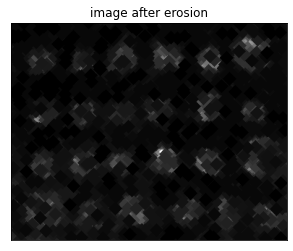

Number of coins in the image:  29


In [113]:
# SOBEL
img = cv2.imread('../images/coins.png', 0)
Mx = [[-1,0,1], 
      [-2,0,2],
      [-1,0,1]]
My = [[1,2,1], 
      [0,0,0],
      [-1,-2,-1]]

img = gradient_filters(img,Mx,My)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()


# erode to remove white spots in between
img = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)), iterations = 9)
plt.imshow(img, cmap='gray')
plt.title('image after erosion')
plt.xticks([]), plt.yticks([]) 
plt.show()

# close to obtain circle shape
# img = cv2.morphologyEx(img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)), iterations=2)
# plt.imshow(img, cmap='gray')
# plt.title('image after closing')
# plt.xticks([]), plt.yticks([]) 
# plt.show()


cnt = 0
vis = np.zeros(img.shape)
h,w = img.shape
for i in range(h):
    for j in range(w):
        if img[i,j]!=0 and vis[i,j]==0:
            temp = bfs(img,i,j,1,vis)
            cnt+=1
            
print('Number of coins in the image: ',cnt)

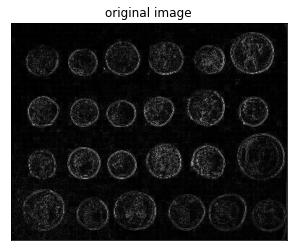

In [4]:
# LAPLACIAN
img = cv2.imread('../images/coins.png', 0)
Mx = [[0,-1,0], 
  [-1,4,-1],
  [0,-1,0]]
My = [[-1,-1,-1], 
  [-1,8,-1],
  [-1,-1,-1]]

img = gradient_filters(img,Mx,My)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

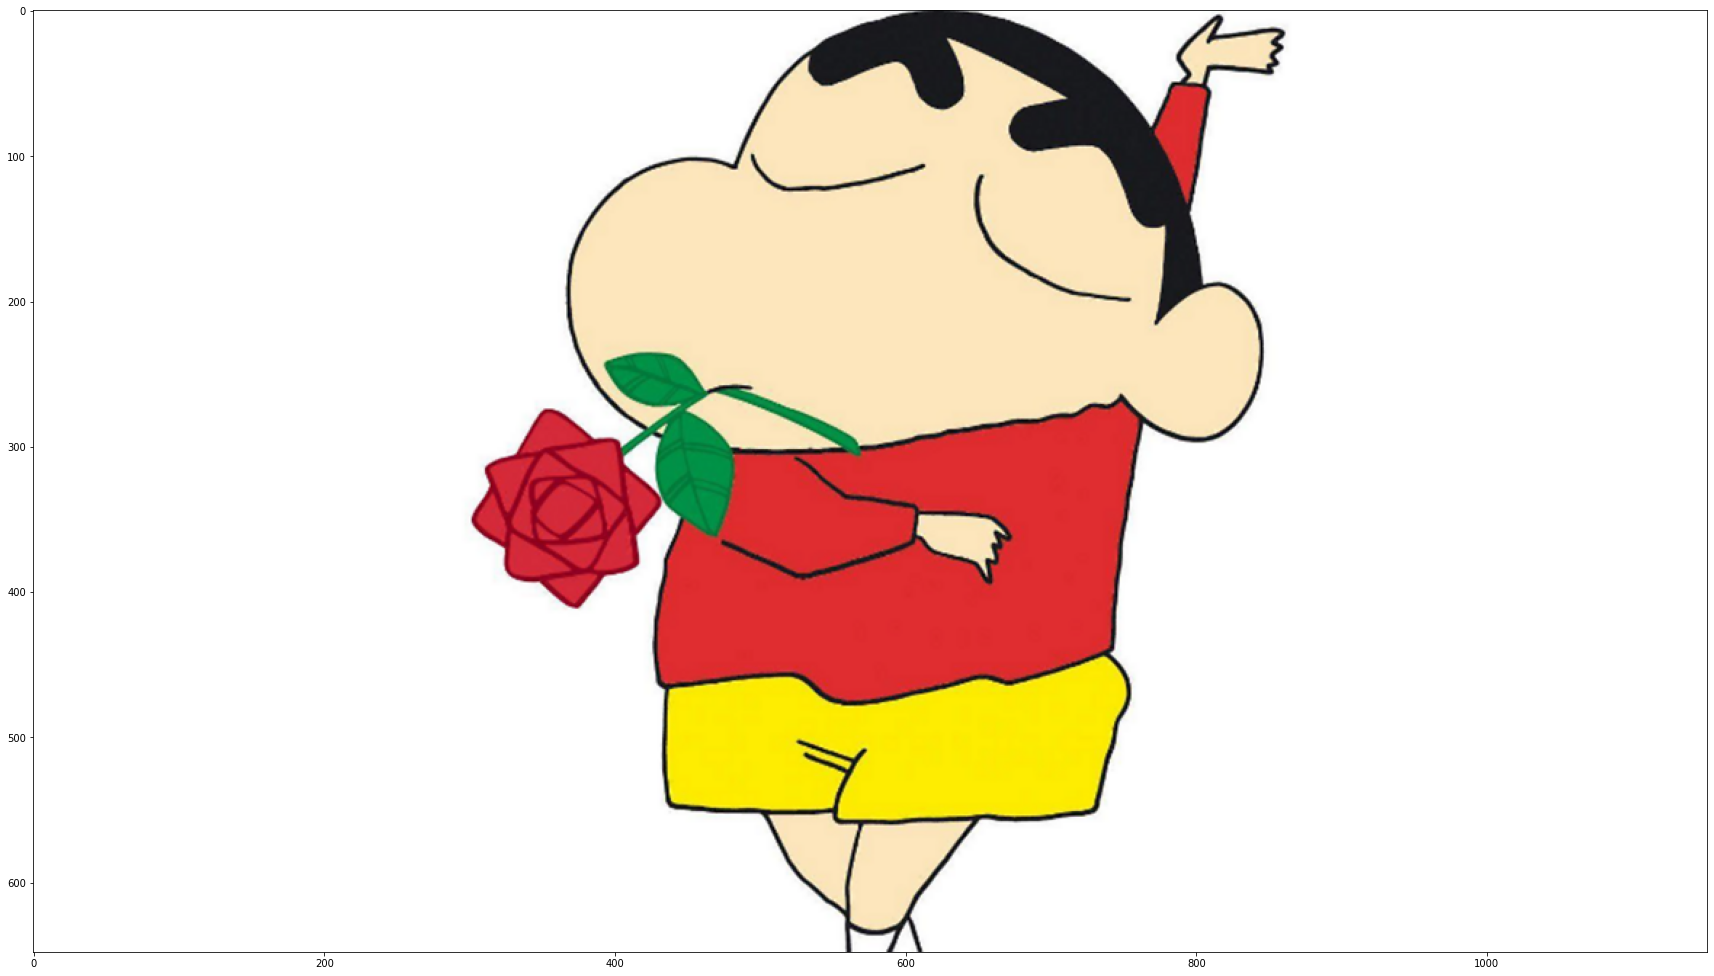

In [120]:
# 6
import pickle, json, sys
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = []
with open('../images/shinchan.pkl', 'rb') as f:
    data = pickle.load(f)
    img = json.loads(data)

dicta = [0 for i in range(256)]
new = np.zeros((len(img), len(img[0]), len(img[0][0])),dtype=int)


for i in img:
    for j in i:
        for k in j:
            dicta[k] += 1
for i in range(len(img)):
    for j in range(len(img[0])):
        for k in range(len(img[0][0])):
            new[i][j][k] = img[i][j][k]

totalPixels = np.prod(new.shape)
plot = plt.figure(figsize=(30,30))
plot.add_subplot(1,1,1)
plt.imshow(new)
sortList = []
for i in range(256):
    sortList.append([dicta[i],i])
sortList.sort()


In [121]:
class Node:
    def __init__(self, left, right, ct):
        self.leftChild = left
        self.rightChild = right
        self.count = ct
        self.num = None
    
    def setNum(self, n):
        self.num = n

nodeSheet = {}
listOfNodes = []
allTimeList = []
for i in range(256):
    nodeSheet[i] = Node(None, None, dicta[i])
    nodeSheet[i].setNum(i)
    allTimeList.append(nodeSheet[i])
    listOfNodes.append([dicta[i], len(allTimeList)-1])

while len(listOfNodes) > 1:
    listOfNodes.sort()
    s = listOfNodes[0][0]+listOfNodes[1][0]
    newNode = Node(allTimeList[listOfNodes[0][1]], allTimeList[listOfNodes[1][1]], s)
    allTimeList.append(newNode)
    listOfNodes.remove(listOfNodes[0])
    listOfNodes.remove(listOfNodes[0])
    listOfNodes.append([s, len(allTimeList) - 1])
    
root = allTimeList[listOfNodes[0][1]]
assert(listOfNodes[0][0] == totalPixels)

codeDict = {}

def ParseAndCode(node, yet):
    global codeDict
    if node.leftChild == None and node.rightChild == None:
        codeDict[node.num] = yet
    if node.leftChild != None:
        ParseAndCode(node.leftChild, yet + "0")
    if node.rightChild != None:
        ParseAndCode(node.rightChild, yet + "1")
sizeWithPadding = 0


def Encode(data):
    global codeDict, sizeWithPadding
    String = ''''''
    expected = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            for k in range(len(data[0][0])):
                String += codeDict[data[i][j][k]]
                expected += len(codeDict[data[i][j][k]])
    sizeWithPadding = len(String)
    toreturnlen = len(String)

    while len(String) % 7 != 0:
        String += '0'
    finalString = ''''''
    for i in range(0, len(String), 7):
        num = 0
        for j in range(i, i+7):
            num *= 2
            num += int(String[j])-int('0')
        finalString += chr(num)
    return finalString, toreturnlen
yet = ""
ParseAndCode(root, yet)


encoded, bitLen = Encode(img)
stats = ''''''
stats = str(bitLen) + '\n' + str(len(img)) + '\n' + str(len(img[0])) + '\n' + str(len(img[0][0]))
finalString = stats + '\n' + encoded

file = open("sample.bin", "wb")
file.write(finalString.encode())
file.close()

In [122]:
decoded = ''''''
with open("sample.bin", "rb") as f:
    ctr = 0
    while (byte := f.read()):
        print(byte[0:20])
        decoded = byte
        print(type(decoded))

decoded = decoded.decode('ASCII')
split = decoded.split("\n",4)
sizeOfDataString = int(split[0])
dimensions = [int(split[1]), int(split[2]), int(split[3])]
dataAsString = split[4]

def convertStringToBinaryString(s):
    string = ""
    ctrr = 0
    for i in s:
        char = ""
        num = ord(i)
#         print(ctrr)
        ctrr += 1
        for j in range(7):
            if num % 2 == 1:
                char = "1" + char
            else:
                char = "0" + char
            num = num//2
        string += char
    return string


def Decode(string):
    global root
    node = root
    values = []
    ctrr = 0
    for char in string:
        if char == '0':
            node = node.leftChild
        else:
            node = node.rightChild
        if node.leftChild == None and node.rightChild == None:
            values.append(node.num)
            node = root
        ctrr += 1
    print(ctrr)

    return values
    

string = convertStringToBinaryString(dataAsString)
finalBitString = string[:sizeOfDataString]
values = Decode(finalBitString)
newImg = np.zeros((dimensions[0],dimensions[1],dimensions[2]),dtype=int)
ctr = 0

print(newImg.shape)
for i in range(dimensions[0]):
    for j in range(dimensions[1]):
        for k in range(dimensions[2]):
            if ctr >= len(values):
                plot = plt.figure(figsize=(30,30))
                plot.add_subplot(1,1,1)
                plt.imshow(newImg)


            newImg[i][j][k] = values[ctr]
            ctr += 1


plot = plt.figure(figsize=(30,30))
plot.add_subplot(1,1,1)
plt.imshow(newImg)

SyntaxError: invalid syntax (<ipython-input-122-73884f19e680>, line 4)